#  Homework 2

Deadline: March 13th 11:59pm

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 

Exploratory data analysis (EDA) plays a very important role in data science projects. It helps us understand the data and explore the hidden relations between variables. Moreover, it helps us in the selection of the appropriate statistical and machine learning tools and techniques. In this problem we are going to perform an exploratory data analysis on 120 years of Olympics data. (65%)

**a)** Download the data from [this Kaggle data repository](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv) and load the athlete_event.csv file into a pandas DataFrame called olympics120. Filter the DataFrame so that it only contains data about the Summer season. **Hint:** one way to do this is with pandas query() function.

In [39]:
import pandas as pd

olympics120 = pd.read_csv('../Data/olympics120/athlete_events.csv').query("Season == 'Summer'")
olympics120.describe()

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.00000,222552.000000
mean,67998.925712,25.674053,175.515551,70.68906,1976.317094
std,39139.038228,6.699839,10.914725,14.80394,30.942802
min,1.000000,10.000000,127.000000,25.00000,1896.000000
25%,34000.750000,21.000000,168.000000,60.00000,1956.000000
50%,68302.500000,24.000000,175.000000,70.00000,1984.000000
75%,101881.000000,28.000000,183.000000,79.00000,2000.000000
max,135568.000000,97.000000,226.000000,214.00000,2016.000000


**b)** Retrieve some basic descriptive statistics about the dataset using the .describe() method of pandas DataFrames. Now, try to guess which sports have the shortest, tallest (height column), heaviest, lightest (weight column), youngest and oldest (age column) athletes in the Olympics. Then, check your guess based on the data! Print out which sport has the tallest, shortest, heaviest, lightest, youngest and oldest athletes.

In [40]:
from math import isnan

sports = {}
categories = ['Height', 'Weight', 'Age']

for sport in set(olympics120['Sport']):
	sports[sport] = olympics120.query("Sport == @sport").describe().loc['mean']

for category in categories:
	cat = {}

	for sport in sports:
		cat[sport] = sports[sport][category]

	cat = {k: cat[k] for k in cat if not isnan(cat[k])}

	print(f'{category}'
		  f'\nmax - {max(cat)}: '
		  		f'{round(max(cat.values()),2)}'
		  f'\nmin - {min(cat)}: '
		  		f'{round(min(cat.values()),2)}'
		  f'\n')

Height
max - Wrestling: 190.87
min - Archery: 162.94

Weight
max - Wrestling: 95.62
min - Archery: 48.76

Age
max - Wrestling: 53.33
min - Aeronautics: 18.74



**c)** Consider only the male athletes of the following sports: Basketball, Gymnastics, Wrestling. Make a scatter plot in which the x axis shows the athletes' weights and the y axis shows the athletes' heights. Each sport should be represented by a different color point on the plot. Make one scatter plot like this for the 2012 London Olympics, and another for the 1960 Rome Olympics. **Hints:** You can create the scatterplots with the .scatterplot() function of the seaborn package. You can place the scatterplots next to each other with the help of the .subplot() function of the matplotlib.pyplot package. You can fix the scales of the axes with the matplotlib.pyplot.xlim([lower, upper]) function. It is not required to use these hints, but seaborn and matplotlib are good libraries to explore for plotting:) 

<span style="color:red">What is the relationship between the heights and weights of athletes in these sports? How do these data differ for the 1960 and 2012 Olympics?</span>

In [41]:
london_2012 = olympics120.query("Year == 2012 & City == 'London'")
rome_1960 = olympics120.query("Year == 1960 & City == 'Roma'")

sports = ['Basketball', 'Gymnastics', 'Wrestling']
sex = 'M'

lon_2012 = london_2012.loc[
	(london_2012['Sex'] == sex)
	 &
	(london_2012['Sport'].isin(sports))
]
r_1960 = rome_1960.loc[
	(rome_1960['Sex'] == sex)
	&
	(rome_1960['Sport'].isin(sports))
	]

names = ['London 2012 Olympics', 'Roma 1960 Olympics']
datasets = [lon_2012, r_1960]

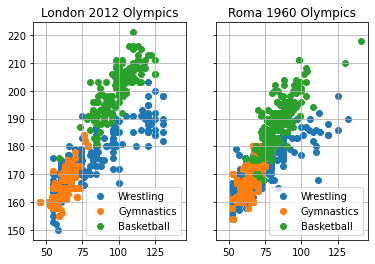

In [42]:
import matplotlib.pyplot as plt

plots = len(datasets)

fig, ax = plt.subplots(1,plots, sharex = True, sharey = True)

for i in range(plots):
	for sport in sports[::-1]:
		sport_data = datasets[i].query('Sport == @sport')
		ax[i].scatter(sport_data['Weight'], sport_data['Height'], label=sport)

	ax[i].set_title(names[i])
	ax[i].legend()
	ax[i].grid(True)

**d)** We are curious about which countries have the most gold medals per 1 million people. <br>
- Calculate how many gold medals the each country won per year at the Summer Olympics. **Hints:** You can filter the data with the query() function, keeping only the rows with gold medals. Then you can groupby() the country name and year attributes, and use .apply(lambda x: len(pd.unique(x))) on the Events column: <br> <br> gold_medals=DataFramegolds.groupby(['NOC', 'Year']).Event.apply(lambda x: len(pd.unique(x))) <br> <br> 
<span style="color:red">Describe what the above line of code is doing</span>


- Store this information in a new data frame containing the countries, year and number of gold metals. **Hints:** What is the type of the "gold_medals" variable you calculated in the last step? Try turning this object into lists using for example, list(gold_medals) and list(gold_medals.index). Now can you store the data from those lists in a new DataFrame? The new DataFrame should look something like this:
<table><tr><th></th><th>NOC</th><th>YEAR</th><th>GOLDMEDALS</th></tr><tr><td>1</td><td>ALG</td><td>1992</td><td>1</td></tr><tr><td>2</td><td>ALG</td><td>1996</td><td>2</td></tr></table>
- Using this dataframe, sum the number of gold metals per country across all years. **Hints:** You can groupby country and then call the .sum() function on the gold medals column. Update your dataframe to contain only the country names and the gold medals, something like this:
<table><tr><th></th><th>NOC</th><th>GOLDMEDALS</th></tr><tr><td>1</td><td>ALG</td><td>1</td></tr><tr><td>2</td><td>ANZ</td><td>3</td></tr></table>
- Load the population data from https://math.bme.hu/~pinterj/BevAdat1/Adatok/OlympicsPopulation.xlsx into a pandas DataFrame without downloading the file, then merge the two tables.
- Add a new column to the data frame which shows the number of gold medals per capita by dividing the number of gold medals by the country's population. Multiply this result by 1,000,000 to instead show the number of gold metals per one million people.
- Which countries have the most gold medals per one million people? **Hint:** You can use the pandas sort_values() function.

---

In [43]:
# the line below creates a list of how many gold medals a country won each year
df_golds = olympics120.query("Medal == 'Gold'").groupby(
	["NOC", "Year"]).Event.apply(lambda x: len(pd.unique(x)))
noc_golds = df_golds.groupby(["NOC"]).sum()

df_pop = pd.read_excel('https://math.bme.hu/~pinterj/BevAdat1/Adatok/OlympicsPopulation.xlsx')

merged_df = df_pop.merge(noc_golds, how='inner', on='NOC')
merged_df['Golds Per Mil'] = 1000000*merged_df['Event']/merged_df['POPULATION']
merged_df.sort_values(by='Golds Per Mil', ascending=False)

,NOC,POPULATION,Event,Golds Per Mil
32,FIN,5.530719e+06,104,18.804065
42,HUN,9.749763e+06,178,18.256854
10,BAH,3.932480e+05,6,15.257547
80,SWE,1.035344e+07,150,14.487936
64,NOR,5.379475e+06,56,10.409938
...,...,...,...,...
43,INA,2.735236e+08,7,0.025592
62,NGR,2.061396e+08,3,0.014553
66,PAK,2.208923e+08,3,0.013581
93,VIE,9.733858e+07,1,0.010273


## Exercise 2

Let's improve on the model used in class: decision tree on the bank dataset. (35%) 

**a)** In class we solved a classification problem on the *bank.csv* dataset using the kNN algorithm. The classifier performed poorly. Repeat the analysis carried out in class (based on the Notebook02), but now use a decision tree, set the maximum depth to be 6! **Hint:** Use the *tree.DecisionTreeClassifier* classifier!


In [47]:
bank_data = pd.read_csv("../Data/bank.csv", delimiter = " ", names = ['age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'])

numeric_data = bank_data.replace(['NO', 'YES', 'MALE', 'FEMALE'],[0,1,0,1])
one_hot = pd.get_dummies(numeric_data['region'])
numeric_data = numeric_data.drop('region', axis = 1)
numeric_data = numeric_data.join(one_hot)
numeric_data.head()

,age,sex,income,married,children,car,save_acct,current_acct,mortgage,pep,INNER_CITY,RURAL,SUBURBAN,TOWN
0,48,1,17546.0,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.1,1,3,1,0,1,1,0,0,0,0,1
2,51,1,16575.4,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.4,1,3,0,0,1,0,0,0,0,0,1
4,57,1,50576.3,1,0,0,1,0,0,0,0,1,0,0


In [52]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

bank_labels = numeric_data['pep']
bank_attrs  = numeric_data.drop('pep', axis=1)
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_attrs, bank_labels, test_size=0.33, random_state=42)

classifier = DecisionTreeClassifier(max_depth=6)
classifier.fit(bank_features_train,bank_labels_train)

DecisionTreeClassifier(max_depth=6)

**b)** Now fit the tree using different parameters! Plot the ROC curve of the decision tree obtained in part a) and the new tree in the same figure (with different colors). Also plot the *y=x* diagonal line!

In [53]:
classifier2 = DecisionTreeClassifier(max_depth=10)
classifier2.fit(bank_features_train,bank_labels_train)

DecisionTreeClassifier(max_depth=10)

**c)** Plot and interpret the decision tree. The easiest way to do this is with the sklearn.tree.plot_tree function. Here's a useful article: https://pythoninoffice.com/how-to-a-plot-decision-tree-in-python/.

* If you would like, you can try plotting the decision tree using the graphviz package too. **Hints:** Visualize the decision tree trained in part a) using the *tree.export_graphviz* function. To present the tree use the *graphviz.Source* function or the *SVG* function of the *Ipython.display* package! If *graphviz* is not installed you can install it using the Anaconda Navigator or by using *pip install* or by installing with homebrew, *brew install graphviz*. If it doesn't seem to work you can also download it from this [link](https://graphviz.gitlab.io/download/) and inserting the following lines of codes (use the correct path for your downloaded file):<br><br>
import os <br>
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin') <br><br>

* Briefly interpret the results! <span style="color:red">According to what attribute did we split the tree first? Which were the usual splitting attributes? </span>